In [41]:
import os, shutil
import matplotlib.pyplot as plt

from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

# Data split

In [42]:
# Original dataset directory
original_dataset_dir = '/Users/Tajr/Desktop/Data/RadonPlus/RadonTechnology/Dev/Deep Learning/Datasets/CatDog'

# Working directory
base_dir = '/Users/Tajr/Desktop/Data/RadonPlus/RadonTechnology/Dev/Deep Learning/Datasets/CatDog/SmallDataset'
os.mkdir(base_dir)

# Creating Train, Validation and Test directory
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(train_dir)
os.mkdir(test_dir)
os.mkdir(validation_dir)


# Cats directories for train, test and validation
train_cats_dir = os.path.join(train_dir, 'cats')
test_cats_dir = os.path.join(test_dir, 'cats')
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(train_cats_dir)
os.mkdir(test_cats_dir)
os.mkdir(validation_cats_dir)

# Dogs directories for train, test and validation
train_dogs_dir = os.path.join(train_dir, 'dogs')
test_dogs_dir = os.path.join(test_dir, 'dogs')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(train_dogs_dir)
os.mkdir(test_dogs_dir)
os.mkdir(validation_dogs_dir)




print('successful')

successful


# Copy data 

In [43]:
# First 1000 cat images are to be copied on train_cat_dir
file_names =  ['cat.{}.jpg'.format(i) for i in range(1000)]
for file_name in file_names:
    src = os.path.join(original_dataset_dir, file_name)
    dst = os.path.join(train_cats_dir, file_name)
    shutil.copyfile(src, dst)

print('successful')

successful


In [44]:
# 500 cat images for validation
file_names = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for file_name in file_names:
    src = os.path.join(original_dataset_dir, file_name)
    dst = os.path.join(validation_cats_dir, file_name)
    shutil.copyfile(src, dst)

print('successful')

successful


In [45]:
# 500 cat images for testing
file_names = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for file_name in file_names:
    src = os.path.join(original_dataset_dir, file_name)
    dst = os.path.join(test_cats_dir, file_name)
    shutil.copyfile(src, dst)

print('successful')

successful


In [46]:
# 1000 dog images for training
file_names = ['dog.{}.jpg'.format(i) for i in range(1000)]
for file_name in file_names:
    src = os.path.join(original_dataset_dir, file_name)
    dst = os.path.join(train_dogs_dir, file_name)
    shutil.copyfile(src, dst)

print('successful')

successful


In [47]:
# 500 dog images for validation
file_names = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for file_name in file_names:
    src = os.path.join(original_dataset_dir, file_name)
    dst = os.path.join(validation_dogs_dir, file_name)
    shutil.copyfile(src, dst)
    
print('successful')

successful


In [48]:
# 500 dogs images for testing
file_names = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for file_name in file_names:
    src = os.path.join(original_dataset_dir, file_name)
    dst = os.path.join(test_dogs_dir, file_name)
    shutil.copyfile(src, dst)
    
print('successful')

successful


# Building a network
<!--  -->Based on the data we have, this is a balanced-binary classification where accuracy is an appropriate measure for success

In [49]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)      

# Compilation

In [50]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Data Preprocessing

In [51]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

for data_batch, label_batch in train_generator:
    print('Data batch shape: ', data_batch.shape)
    print('Label batch shape', label_batch.shape)
    break



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Data batch shape:  (32, 150, 150, 3)
Label batch shape (32,)


# Data Augumentation

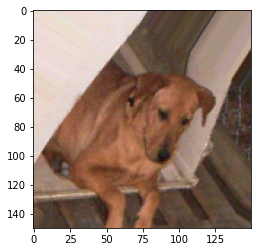

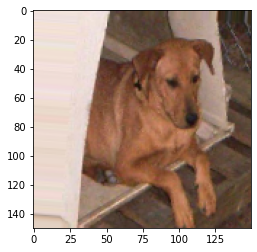

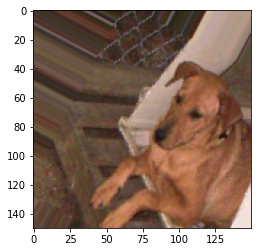

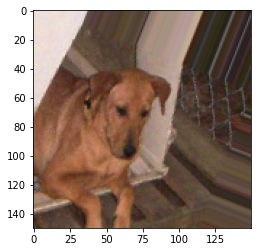

In [52]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

file_names = [os.path.join(train_dogs_dir, file_name) for file_name in os.listdir(train_dogs_dir)]  #Taking file names from a directory

image_path = file_names[3]  # selecting one image

img  = image.load_img(image_path, target_size=(150, 150)) # Load image with a size of 150 x 150

x = image.img_to_array(img)  # Converting image into numpy array

x = x.reshape((1,) + x.shape) # Reshape image (1, 150, 150, 3)

# Plotting 4 images

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

# Model Training

In [53]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)

Epoch 1/100
100/100 [==============================] - 72s 718ms/step - loss: 0.6923 - accuracy: 0.5120 - val_loss: 0.6936 - val_accuracy: 0.5273
Epoch 2/100
100/100 [==============================] - 42s 420ms/step - loss: 0.6777 - accuracy: 0.5675 - val_loss: 0.7046 - val_accuracy: 0.5928
Epoch 3/100
100/100 [==============================] - 40s 396ms/step - loss: 0.6679 - accuracy: 0.5843 - val_loss: 0.6570 - val_accuracy: 0.6098
Epoch 4/100
100/100 [==============================] - 45s 445ms/step - loss: 0.6598 - accuracy: 0.6036 - val_loss: 0.6524 - val_accuracy: 0.6276
Epoch 5/100
100/100 [==============================] - 39s 388ms/step - loss: 0.6408 - accuracy: 0.6199 - val_loss: 0.5442 - val_accuracy: 0.6599
Epoch 6/100
100/100 [==============================] - 46s 459ms/step - loss: 0.6225 - accuracy: 0.6561 - val_loss: 0.5168 - val_accuracy: 0.6579
Epoch 7/100
100/100 [==============================] - 39s 389ms/step - loss: 0.6097 - accuracy: 0.6607 - val_loss: 0.5800 -

Epoch 57/100
100/100 [==============================] - 47s 467ms/step - loss: 0.4262 - accuracy: 0.8090 - val_loss: 0.5337 - val_accuracy: 0.7964
Epoch 58/100
100/100 [==============================] - 39s 392ms/step - loss: 0.4083 - accuracy: 0.8144 - val_loss: 0.7052 - val_accuracy: 0.7792
Epoch 59/100
100/100 [==============================] - 43s 434ms/step - loss: 0.4138 - accuracy: 0.8100 - val_loss: 0.7446 - val_accuracy: 0.7835
Epoch 60/100
100/100 [==============================] - 40s 405ms/step - loss: 0.4242 - accuracy: 0.8072 - val_loss: 0.5464 - val_accuracy: 0.8052
Epoch 61/100
100/100 [==============================] - 44s 443ms/step - loss: 0.4079 - accuracy: 0.8138 - val_loss: 0.5023 - val_accuracy: 0.7403
Epoch 62/100
100/100 [==============================] - 44s 442ms/step - loss: 0.4073 - accuracy: 0.8131 - val_loss: 0.6805 - val_accuracy: 0.7868
Epoch 63/100
100/100 [==============================] - 41s 406ms/step - loss: 0.4061 - accuracy: 0.8119 - val_loss: 0

# Saving a model

In [54]:
model.save('image_classifier_2.h5')

# Visual Exploration

In [55]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

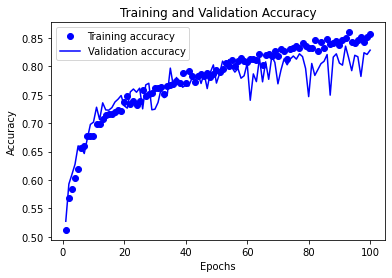

In [56]:
# Data acquisition
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1,  len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


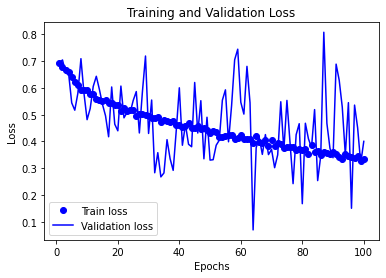

In [57]:
plt.clf()
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'bo', label='Train loss')
plt.plot(epochs, val_loss, 'b',  label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()